In [116]:
# Set up the default parameters
# 1. The code block will be shown in the document
# 2. set up figure display size
# 3. turn off all the warnings and messages

knitr::opts_chunk$set(echo = TRUE)
knitr::opts_chunk$set(fig.width = 8, fig.height = 4)
knitr::opts_chunk$set(warning = FALSE, message = FALSE)


# Background

For this midterm exam, you will analyze monthly domestic passenger data for two of largest airports servicing the New York City metro area: LaGuardia Airport (LGA) and John F. Kennedy International Airport (JFK). The data records the number of passengers embarking on domestic flights out of each airport each month from January 2003 to December 2019.


In [117]:
library(zoo)
library(lubridate)
library(mgcv)
library(TSA)
library(dynlm)
library(xts)
library(ggplot2)
library(dynlm)
library(astsa)
library(forecast)
###############

# Instructions on reading the data

To read the data in `R`, save the file in your working directory (make sure you have changed the directory if different from the R working directory) and read the data using the `R` function `read.csv()`


In [118]:
passengers<-read.csv("Midterm 1 Data.csv")

passengers.LGA.ts <- ts(passengers$LGA, start=2003, frequency = 12)
passengers.JFK.ts <- ts(passengers$JFK, start=2003, frequency = 12)

# Part 1: Trend and Seasonality Modeling

**1a.** Plot the Time Series and the ACF plots for both airports. Comment on the stationarity of both time series based on these plots. Which (if any) assumptions of stationarity are violated for the two time series?


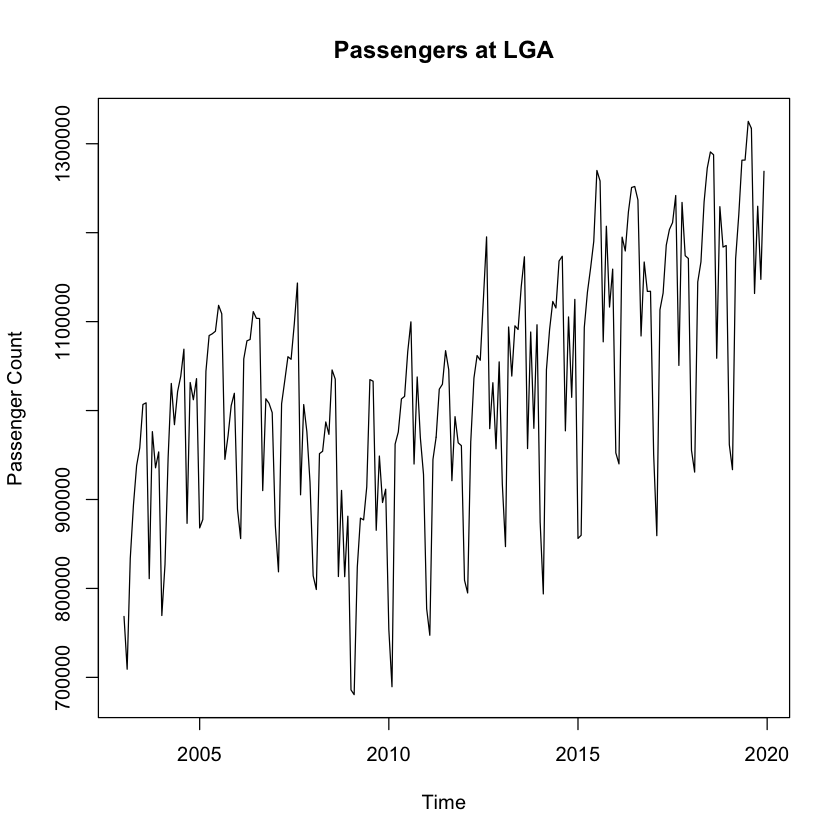

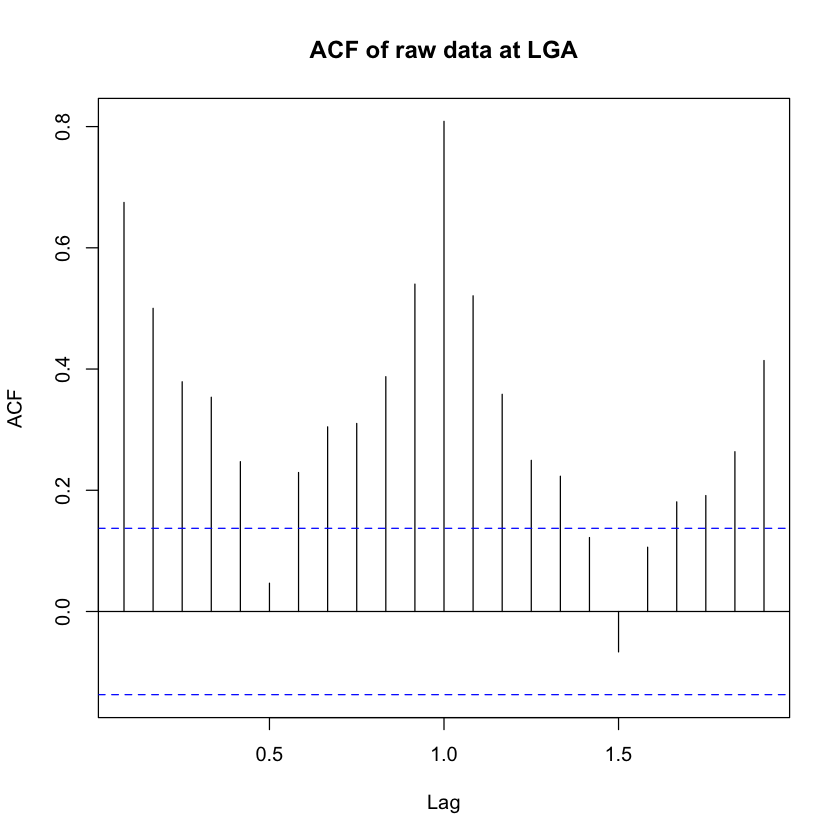

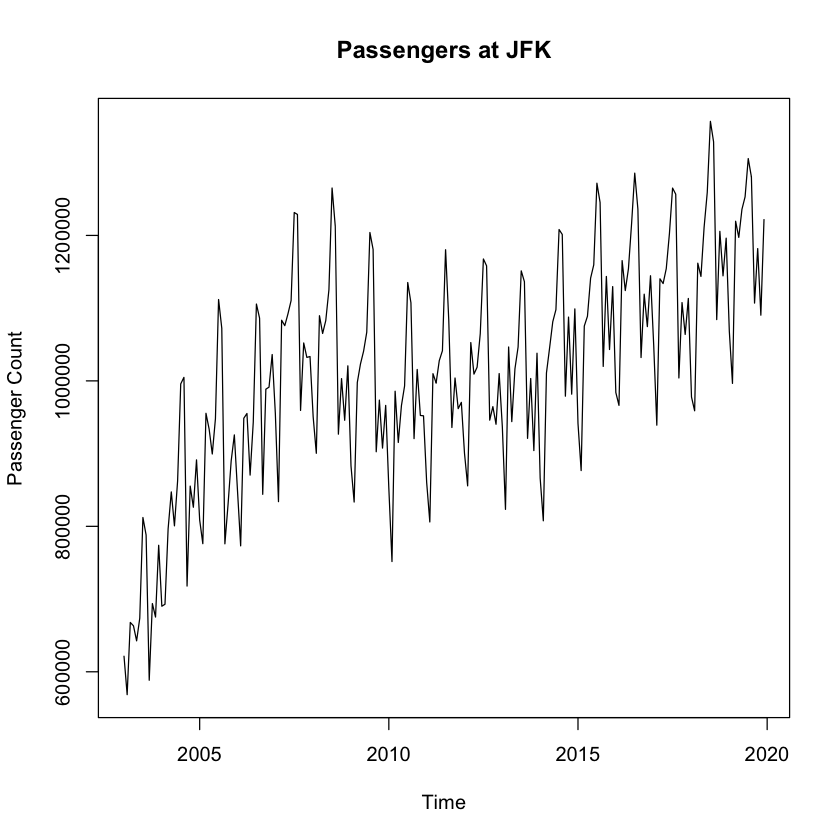

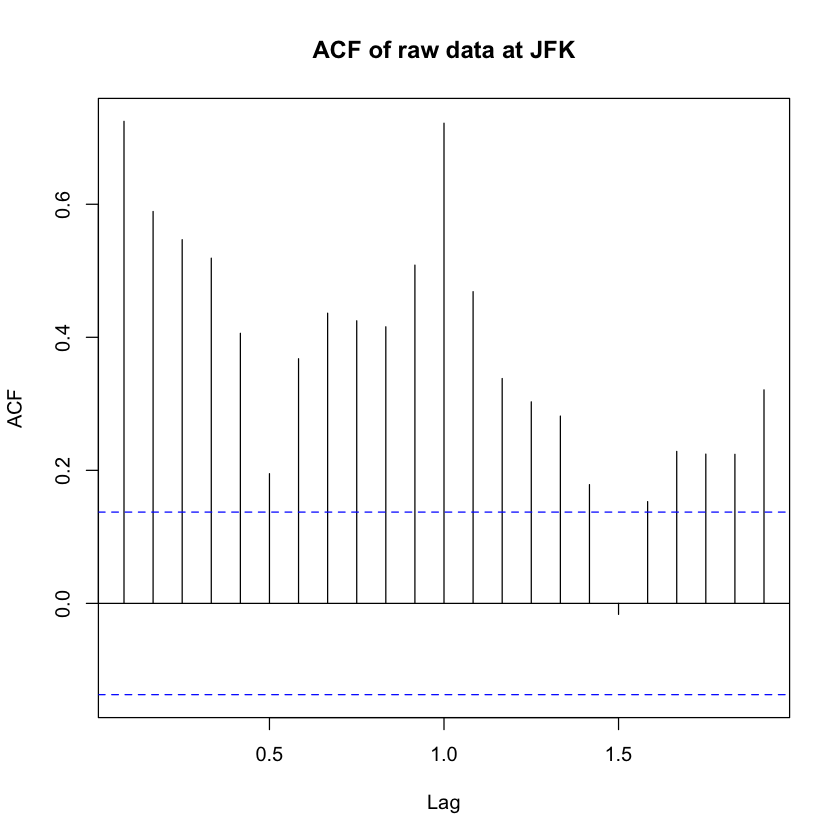

In [119]:
# LGA
plot.ts(passengers.LGA.ts, ylab = "Passenger Count", main = "Passengers at LGA")
acf(passengers.LGA.ts, main = "ACF of raw data at LGA")

# JFK
plot.ts(passengers.JFK.ts, ylab = "Passenger Count", main = "Passengers at JFK")
acf(passengers.JFK.ts, main = "ACF of raw data at JFK")

*Response: Question 1a*
## LGA

LGA airport shows a non-stationary time-series. The auto-correlation function is outside the confidence intervals as almost all lags. The ACF shows clear seasonality with the a distinct pattern at lags of 0.5, 1, and 1.5. Further the ACF plot decreases at higher lags pointing towards some trend in the data. The findings in the ACF plot are corroborated with a visual interpretation of the raw time-series data.

The stationarity assumptions of constant mean that does not depend on time and an autocorrelation function that does not depend on time are violated. 

## JFK

JFK airport shows a similar pattern as LGA. The time-series exhibits non-stationarity with trend and seasonility in the ACF plots. Again, the visual interpretation of the time-series plots corroborates the ACF plot that shows trend and seasonality in the data contributing to the non-stationarity.

The stationarity assumptions of constant mean that does not depend on time and an autocorrelation function that does not depend on time are violated. 

**1b.** Fit a moving average trend and a splines smoothing trend on both time series. Overlay the fitted values derived from each trend estimation model on the corresponding data and calculate the MAPE  for each model. Comment on the effectiveness of each model to estimate the trend for both series.

[1] "LGA MAV MAPE:  0.092406236190031"

[1] "LGA SPLINES MAPE:  0.083290429903823"

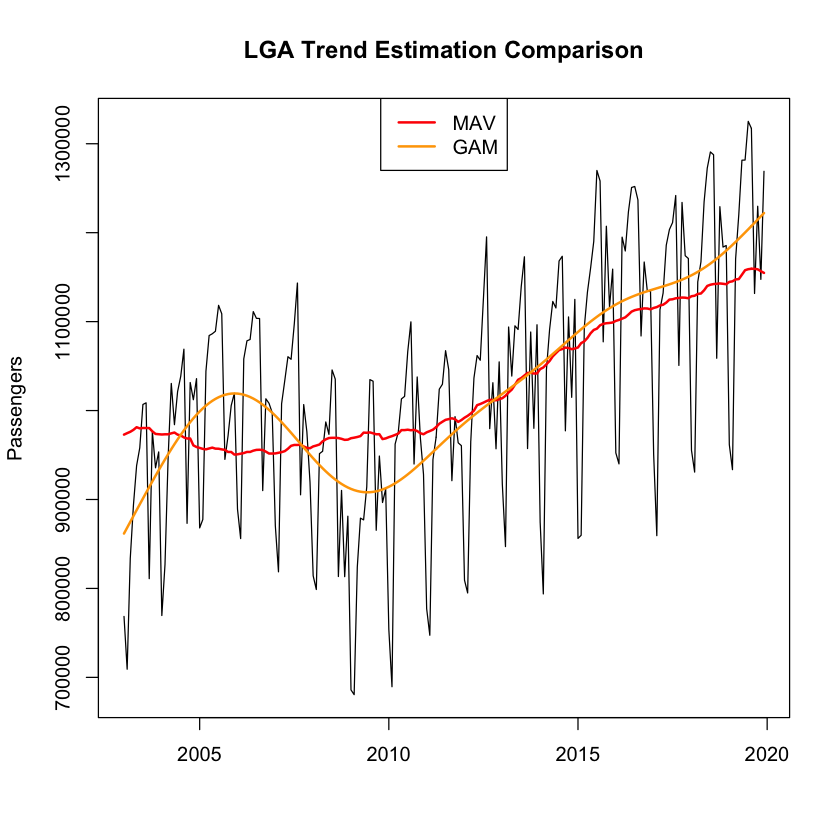

[1] "JFK MAV MAPE:  0.0996844150149692"

[1] "JFK SPLINES MAPE:  0.0791310332895686"

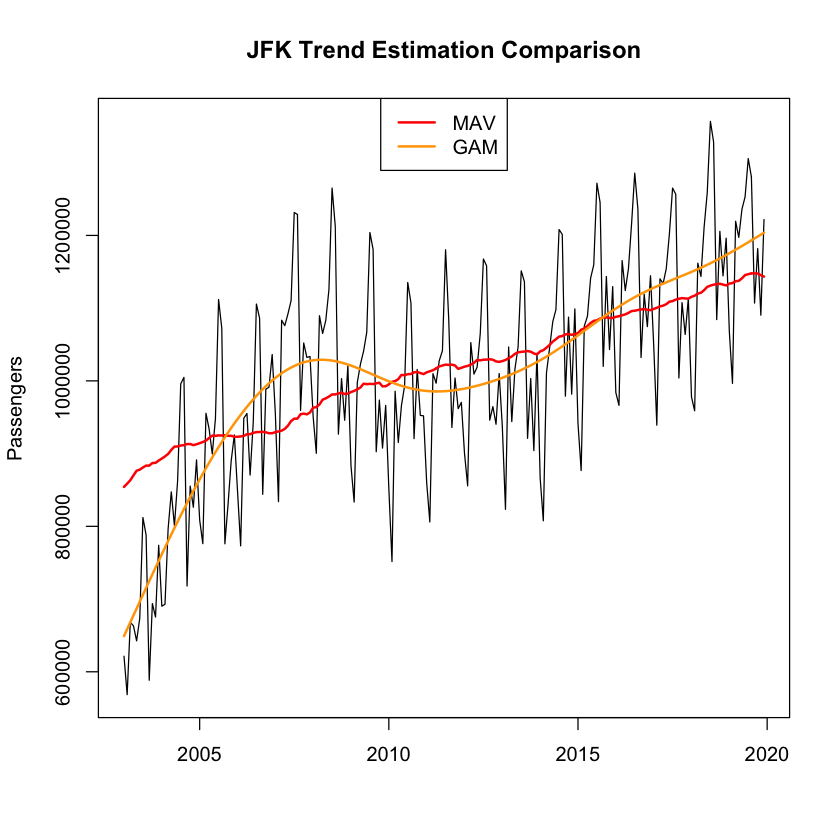

In [120]:
# LGA

points.LGA <- 1:length(passengers.LGA.ts)
points.LGA <- (points.LGA - min(points.LGA)) / max(points.LGA)

## Moving Average
mav.LGA <- ksmooth(points.LGA, passengers.LGA.ts, kernel = "box")
mav.LGA.ts <- ts(mav.LGA$y, start=2003, frequency=12)

## Splines Model
gam.LGA <- gam(passengers.LGA.ts ~ s(points.LGA))
gam.LGA.ts <- ts(fitted(gam.LGA), start=2003, frequency=12)

ts.plot(passengers.LGA.ts, xlab = "", ylab = "Passengers", main = "LGA Trend Estimation Comparison")
lines(mav.LGA.ts, lwd = 2, col = "red")
lines(gam.LGA.ts, lwd = 2,col = "orange")
legend("top",legend = c("MAV", "GAM"),
col = c("red", "orange"), lwd = 2)

paste("LGA MAV MAPE: ", mean(abs(mav.LGA$y - passengers$LGA) / passengers$LGA))
paste("LGA SPLINES MAPE: ", mean(abs(fitted(gam.LGA) - passengers$LGA) / passengers$LGA))

# JFK

points.JFK <- 1:length(passengers.JFK.ts)
points.JFK <- (points.JFK - min(points.JFK)) / max(points.JFK)

## Moving Average
mav.JFK <- ksmooth(points.JFK, passengers.JFK.ts, kernel = "box")
mav.JFK.ts <- ts(mav.JFK$y, start=2003, frequency=12)

## Splines Model
gam.JFK <- gam(passengers.JFK.ts ~ s(points.JFK))
gam.JFK.ts <- ts(fitted(gam.JFK), start=2003, frequency=12)

ts.plot(passengers.JFK.ts, xlab = "", ylab = "Passengers", main = "JFK Trend Estimation Comparison")
lines(mav.JFK.ts, lwd = 2, col = "red")
lines(gam.JFK.ts, lwd = 2,col = "orange")
legend("top",legend = c("MAV", "GAM"),
col = c("red", "orange"), lwd = 2)

paste("JFK MAV MAPE: ", mean(abs(mav.JFK$y - passengers$JFK) / passengers$JFK))
paste("JFK SPLINES MAPE: ", mean(abs(fitted(gam.JFK) - passengers$JFK) / passengers$JFK))

*Response: Question 1b*

In both models (LGA and JFK), the MAPE value is lower in the splines model indicating a better fit. This quantitiative observation is corroborated by visual interpretation of the overlayed trend estimations. The splines model follows the trend of the data much better especially at the earlier time periods.

**1c.** Plot the fitted values for the moving average model for each airport that you created in part (b) on the same plot. Likewise, plot the fitted values for the splines smoothing model for both time series from part (b) together on a separate plot from the on with the moving average fit. Compare domestic passenger activity for the two airports over the time period using these two plots. Comment on differences and similarities. *Be sure to label each trend line appropriately.*

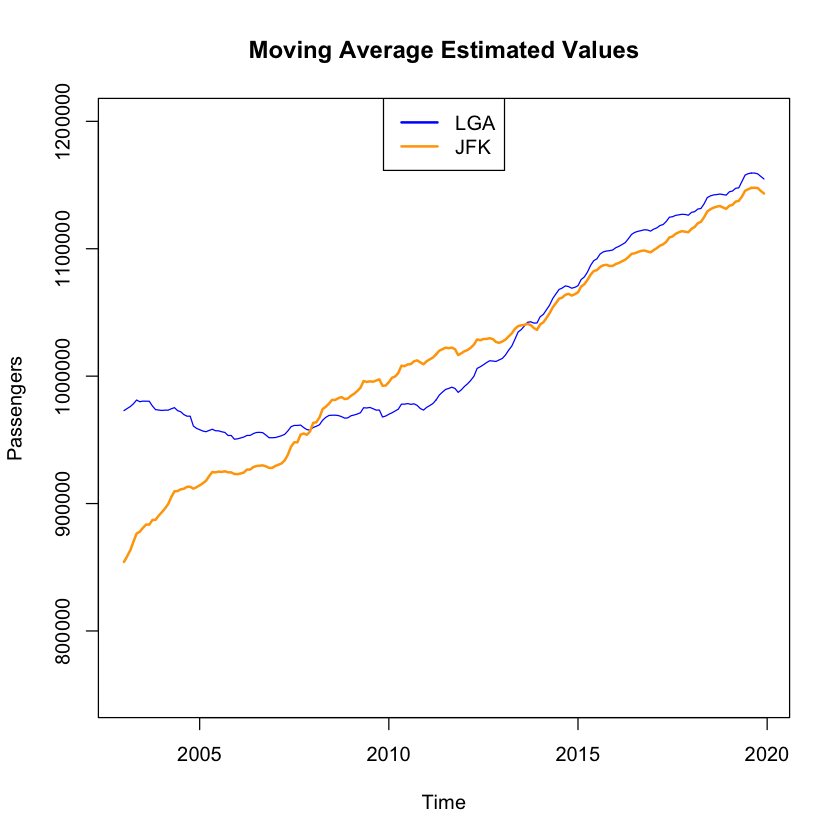

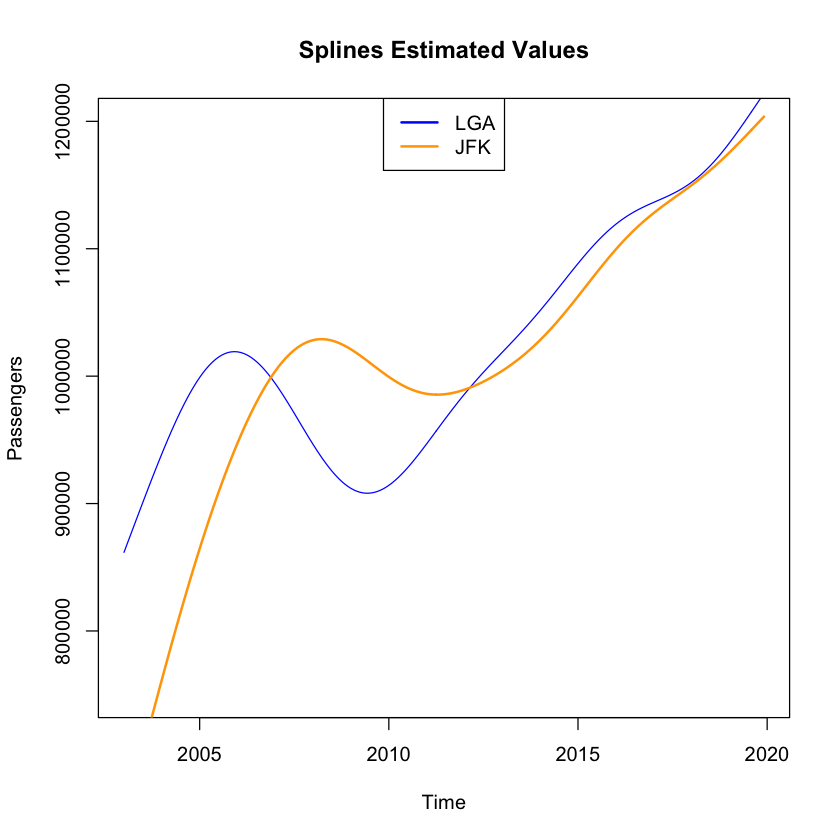

In [121]:
# Moving Average
plot.ts(mav.LGA.ts, ylab="Passengers", main="Moving Average Estimated Values", col="blue", ylim=c(750000, 1200000))
lines(mav.JFK.ts, lwd=2, col="orange")
legend("top",legend = c("LGA", "JFK"),col = c("blue", "orange"), lwd = 2)

# Splines
plot.ts(gam.LGA.ts, ylab="Passengers", main="Splines Estimated Values", col="blue", ylim=c(750000, 1200000))
lines(gam.JFK.ts, lwd=2, col="orange")
legend("top",legend = c("LGA", "JFK"),col = c("blue", "orange"), lwd = 2)

*Response: Question 1c*

Using the moving average approach, both airports show a rise in the number of passengers over the years. In the time period from 2003-2010 LGA shows little to no growth while JFK's has a consistent increase in the number of passengers year over year. The rate of increase from 2010 to present day is similar between the two airports.

Using the splines approach the observation is different between the two airports from 2003-2010. LGA no longer shows a constant number of passengers but rather an initial rise peacking in 2005 followed by a subsequent dip. Both airports show a decrease in number of passengers ~2008-2009 likely from the economic recession that hit around this time. Following this date both models show simila rate of increase from 2012 to present day.

Between the two models the MAV approach does not capture the dip in 2008-2009 while the splines model does.

**1d.** Fit a nonparametric trend-seasonality model to each of the two time series. Overlay the fitted values for both models on their respective series and calculate MAPE for each model. How does the fit of these models compare with the trend estimation models that you created in 1(b)? Does the addition of seasonality improve the fit?

[1] "LGA MAPE:  0.0224621141818047"

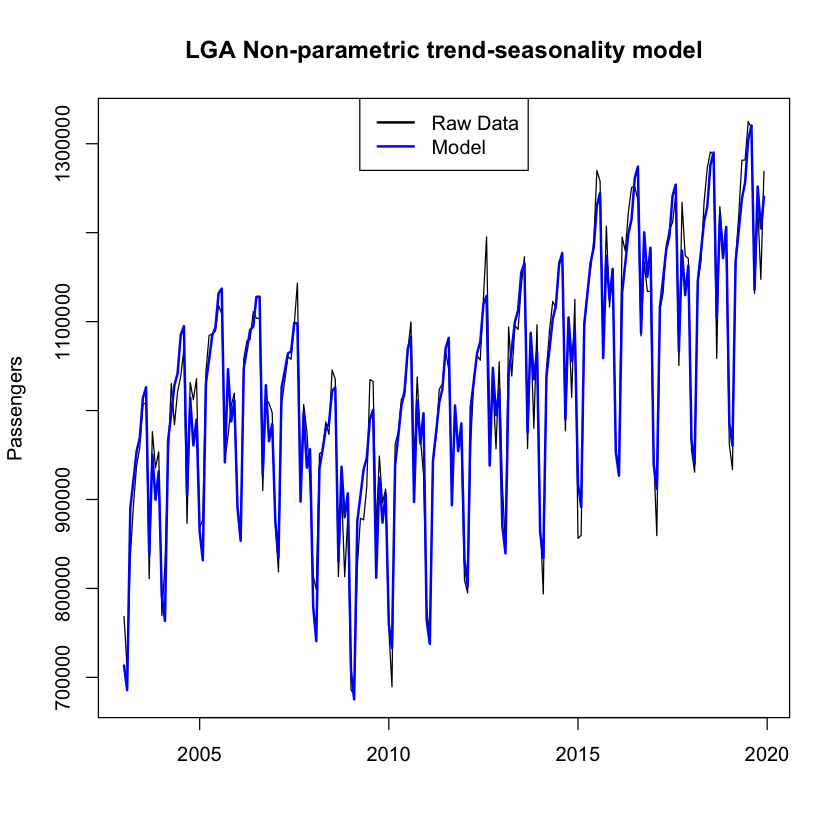

[1] "JFK MAPE:  0.0265048315045444"

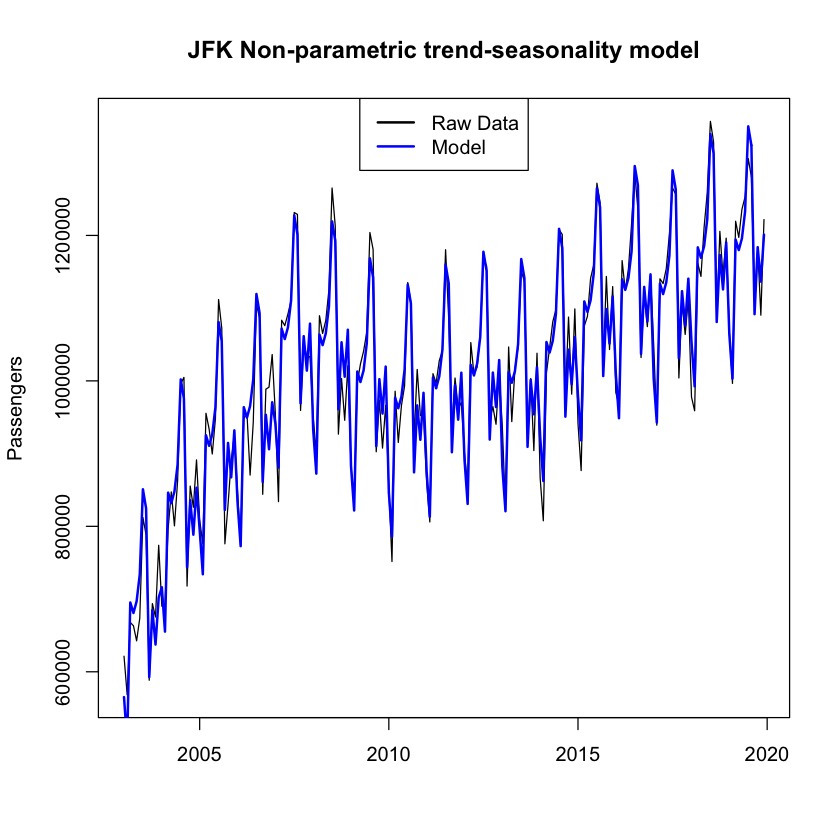

In [122]:
month = as.factor(passengers$Month)
year = as.factor(passengers$Year)

# LGA
gam.LGA.seastr = gam(passengers.LGA.ts ~ s(points.LGA)+month+year)
fit.gam.LGA.seastr = fitted(gam.LGA.seastr)
fit.gam.LGA.seastr.ts = ts(fit.gam.LGA.seastr, start=2003, frequency=12)
plot.ts(passengers.LGA.ts, main="LGA Non-parametric trend-seasonality model", xlab="", ylab="Passengers")
lines(fit.gam.LGA.seastr.ts, lwd=2,col="blue")
legend("top",legend = c("Raw Data", "Model"),col = c("black", "blue"), lwd = 2)
paste("LGA MAPE: ", mean(abs(fit.gam.LGA.seastr - passengers$LGA) / passengers$LGA))

# JFK
gam.JFK.seastr = gam(passengers.JFK.ts ~ s(points.JFK)+month+year)
fit.gam.JFK.seastr = fitted(gam.JFK.seastr)
fit.gam.JFK.seastr.ts = ts(fit.gam.JFK.seastr, start=2003, frequency=12)
plot.ts(passengers.JFK.ts, main="JFK Non-parametric trend-seasonality model", xlab="", ylab="Passengers")
lines(fit.gam.JFK.seastr.ts, lwd=2,col="blue")
legend("top",legend = c("Raw Data", "Model"),col = c("black", "blue"), lwd = 2)
paste("JFK MAPE: ", mean(abs(fit.gam.JFK.seastr - passengers$JFK) / passengers$JFK))

*Response: Question 1d*

The non-parametric model with seasonality improved the fit for both airports. The MAPE of the non parametric models with seasonility is lower than their counterparts calculated in Question 1b.

**1e.** Plot the residuals and the residual ACF for the models that you created in 1(d). Evaluate stationarity for both model residuals graphically. Provide your explanation on whether the stationarity assumptions hold.

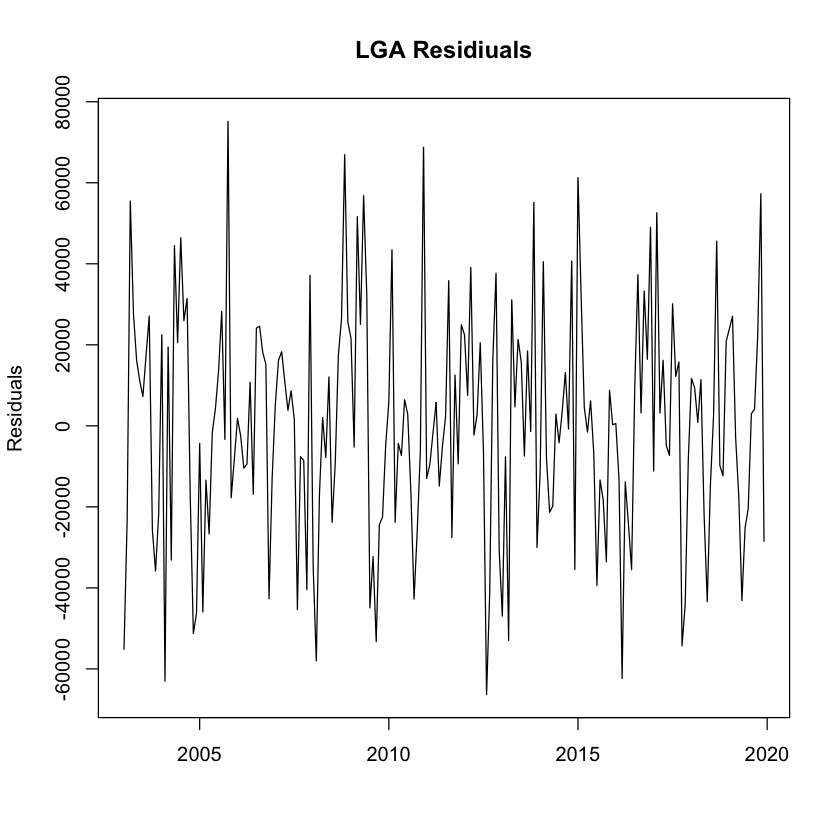

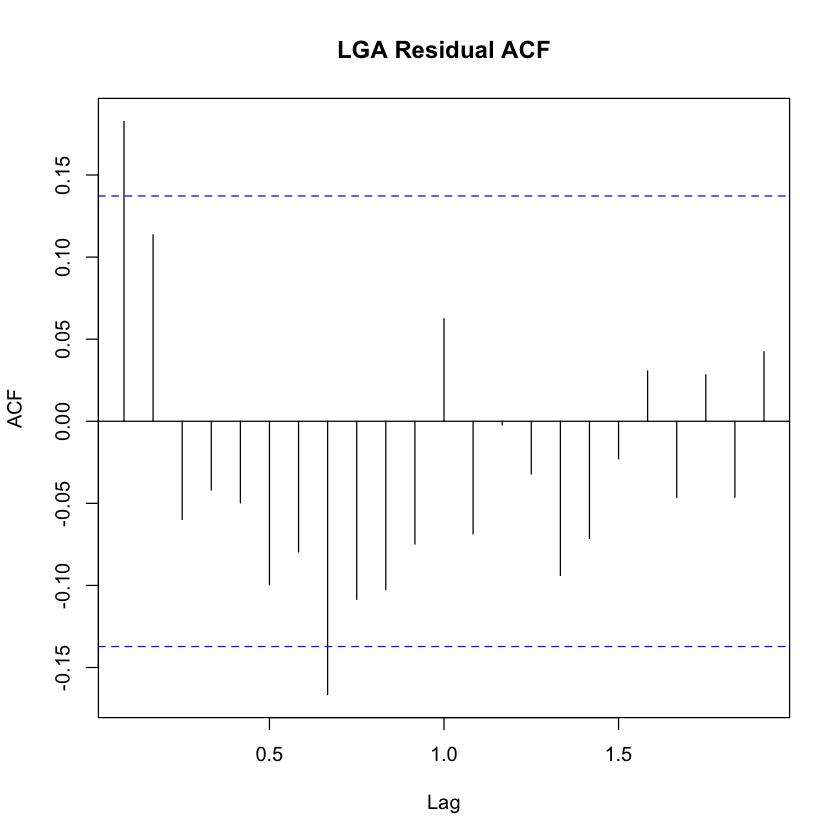

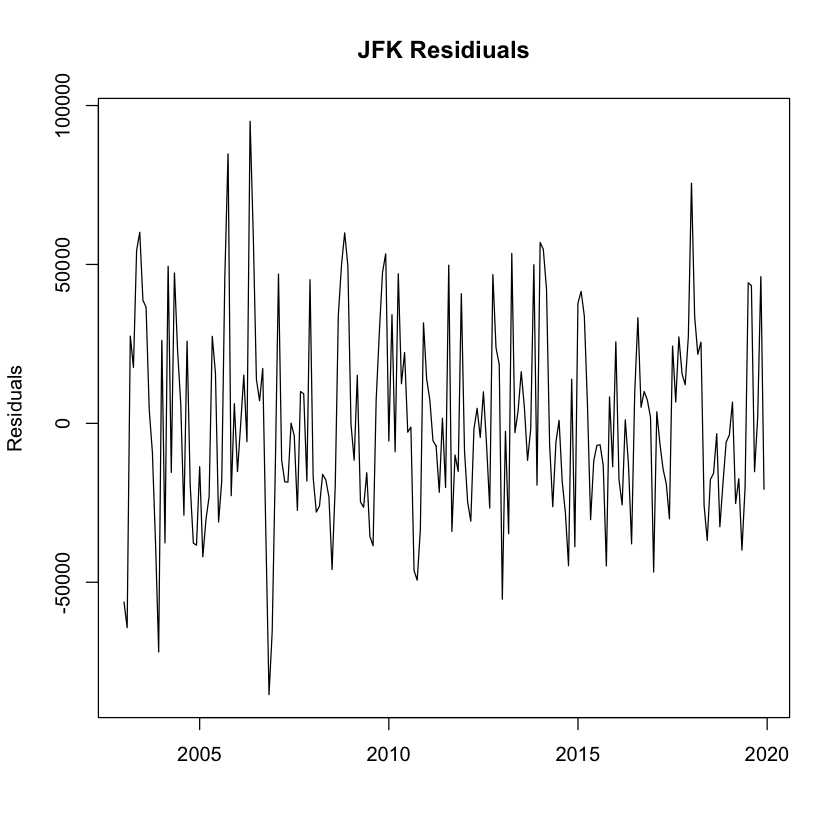

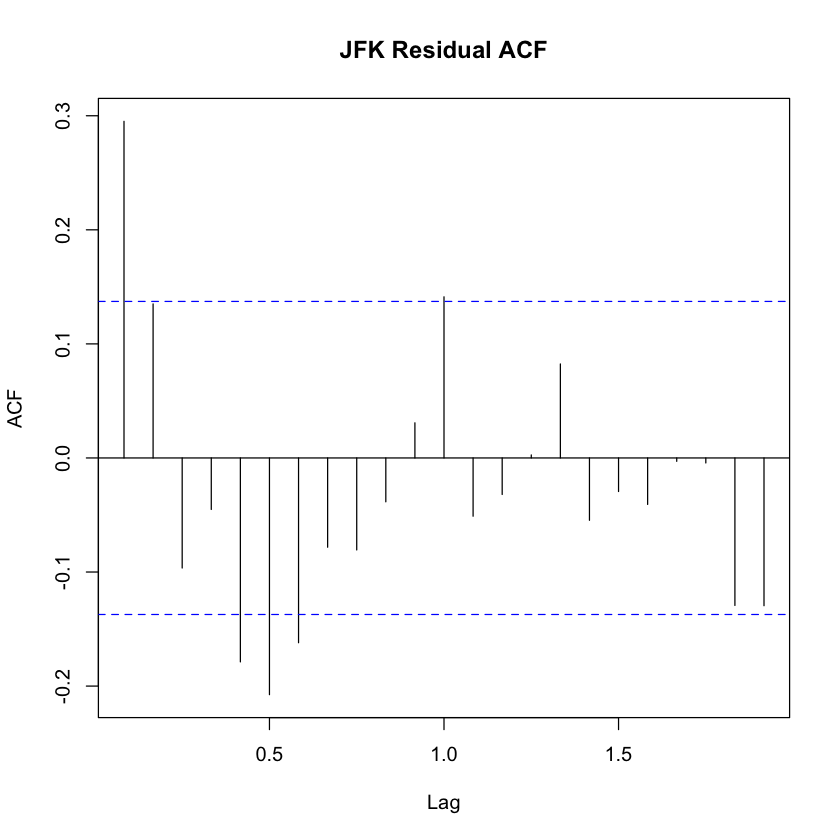

In [123]:
# LGA

gam.seastr.LGA.resid = fit.gam.LGA.seastr - passengers$LGA
gam.seastr.LGA.resid.ts = ts(gam.seastr.LGA.resid, start=2003, frequency=12)
plot.ts(gam.seastr.LGA.resid.ts, main="LGA Residiuals", ylab="Residuals", xlab="")
acf(gam.seastr.LGA.resid.ts, main="LGA Residual ACF")

# JFK

gam.seastr.JFK.resid = fit.gam.JFK.seastr - passengers$JFK
gam.seastr.JFK.resid.ts = ts(gam.seastr.JFK.resid, start=2003, frequency=12)
plot.ts(gam.seastr.JFK.resid.ts, main="JFK Residiuals", ylab="Residuals", xlab="")
acf(gam.seastr.JFK.resid.ts, main="JFK Residual ACF")

*Response: Question 1e*

The stationarity assumptions of the residuals hold for both models. Most ACF lags are within the confidence intervals centralized around 0 and the non-zero ACF do not seem to depend on time. The graphical analysis of both LGA and JFK ACF plots display a weakly stationry times series.

# Part 2: ARIMA Modeling and Forecasting

**2a.** Split the data for both airports into training and test datasets designating the last 12 data points in each dataset as test data and the rest as training data. Fit ARIMA models to both training datasets using orders (0,1,1) and seasonal orders (1,0,1) for both datasets. Evaluate goodness of fit of both of these models using residual analysis.

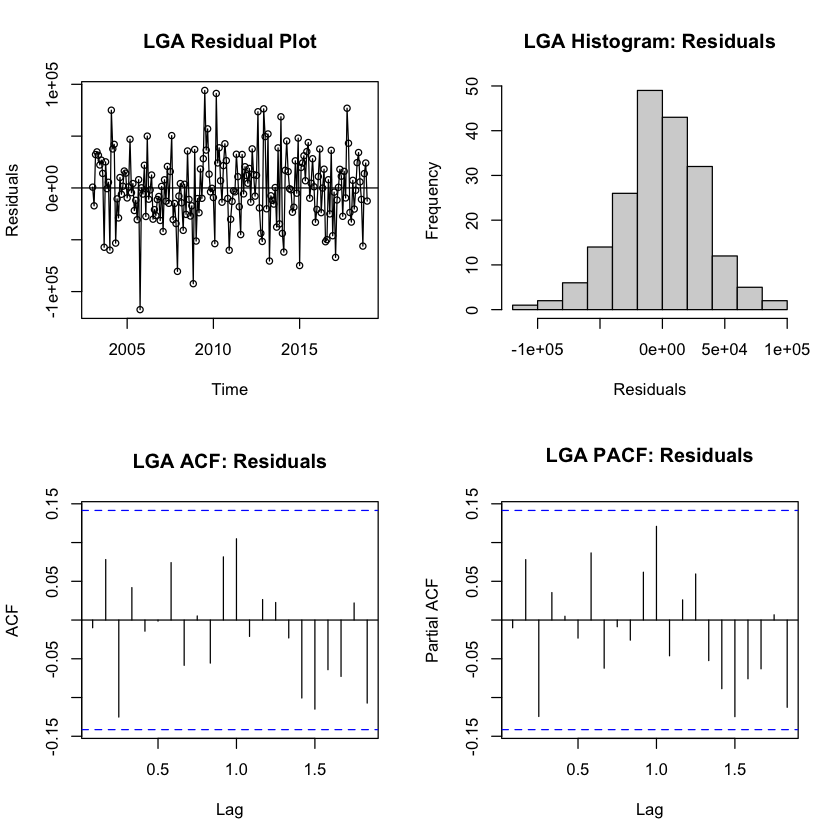

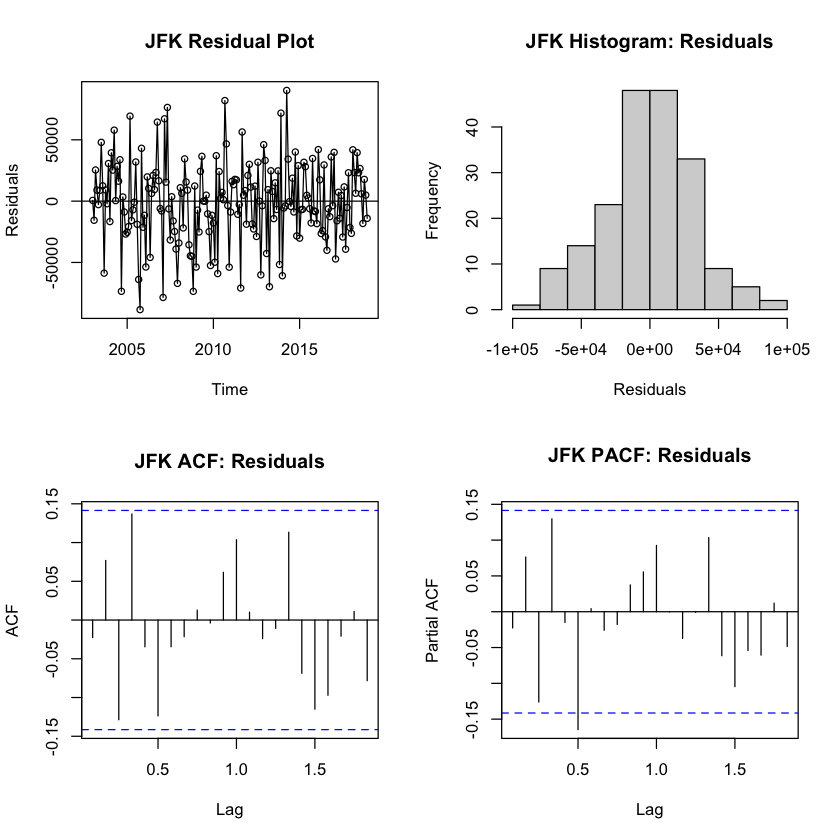

In [124]:
# LGA
passengers.LGA.train = head(passengers.LGA.ts, n=length(passengers$LGA)-12)
passengers.LGA.test = tail(passengers.LGA.ts, n=12)
arima.LGA <- arima(passengers.LGA.train, order=c(0,1,1), seasonal=c(1,0,1),method="ML")
resids.LGA <- resid(arima.LGA)
par(mfrow = c(2, 2))
plot(resids.LGA,
     ylab = 'Residuals',
     type = 'o',
     main = "LGA Residual Plot")
abline(h = 0)
hist(resids.LGA, xlab = 'Residuals', main = 'LGA Histogram: Residuals')
acf(resids.LGA, main = "LGA ACF: Residuals")
pacf(resids.LGA, main = "LGA PACF: Residuals")

# JFK

passengers.JFK.train = head(passengers.JFK.ts, n=length(passengers$JFK)-12)
passengers.JFK.test = tail(passengers.JFK.ts, n=12)
arima.JFK <- arima(passengers.JFK.train, order=c(0,1,1), seasonal=c(1,0,1),method="ML")
resids.JFK <- resid(arima.JFK)
par(mfrow = c(2, 2))
plot(resids.JFK,
     ylab = 'Residuals',
     type = 'o',
     main = "JFK Residual Plot")
abline(h = 0)
hist(resids.JFK, xlab = 'Residuals', main = 'JFK Histogram: Residuals')
acf(resids.JFK, main = "JFK ACF: Residuals")
pacf(resids.JFK, main = "JFK PACF: Residuals")

*Response: Question 2a*

### LGA

The results of the LGA residual analysis show a stationary time series with no lags outside the ACF and PACF plots. Further, the histogram shows the residuals are normally distributed amongst zero. All in all, this model seems to be a good fit for this dataset.

### JFK

The results of the JFK residual analysis show a stationary time series with no lags outside the ACF and PACF plots. Further, the histogram shows the residuals are normally distributed amongst zero. All in all, this model seems to be a good fit for this dataset.

**2b.** Use the models that you created in 2(a) to forecast the next 12 time points for both series. Overlay the predicted values for both series on plots of the values in the corresponding test datasets, including 95% confidence intervals. Calculate MAPE and PM for both models and use both measures and the plots of the predicted values to compare the performance of the two models.

[1] "LGA MAPE:  0.0224386049212476"

[1] "LGA PM 0.0580131321218006"

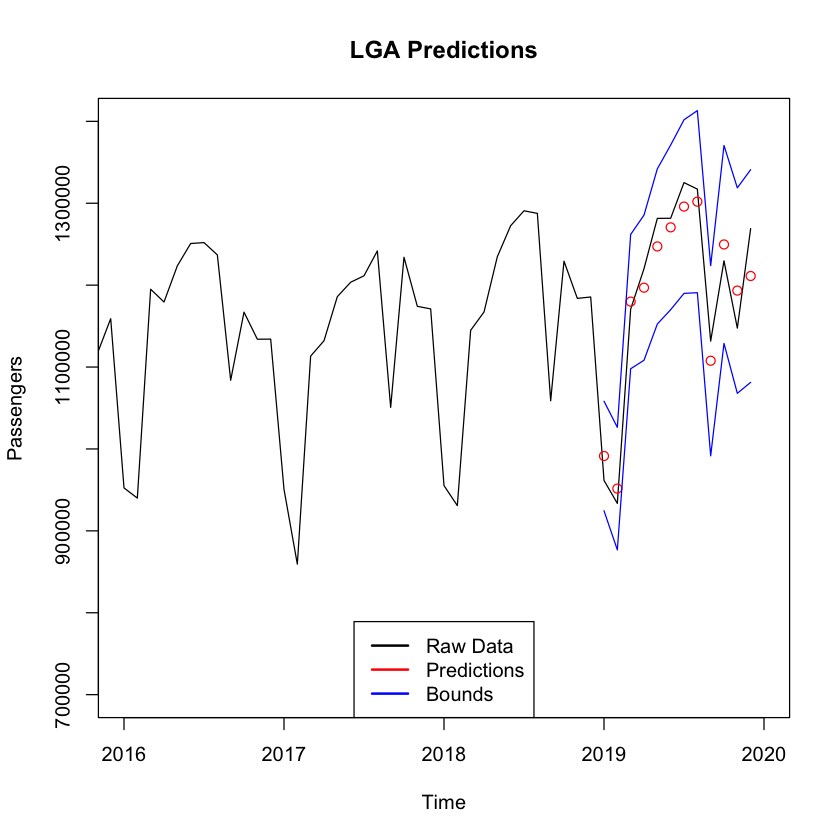

[1] "JFK MAPE:  0.0318559064726606"

[1] "JFK PM 0.273574541747046"

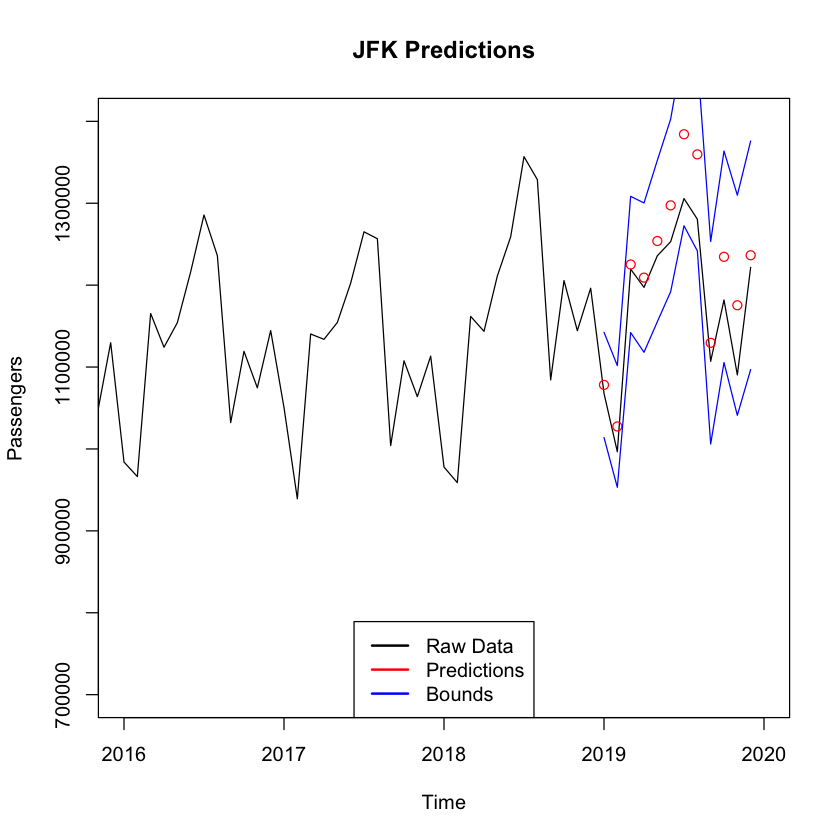

In [125]:
# LGA
predict.LGA = predict(arima.LGA, n.ahead=12)
predict.LGA.ts=ts(predict.LGA$pred, start=2019, frequency=12)
ubound.LGA = predict.LGA$pred+1.96*predict.LGA$se
ubound.LGA.ts = ts(ubound.LGA, start=2019, frequency=12)
lbound.LGA = predict.LGA$pred-1.96*predict.LGA$se
lbound.LGA.ts = ts(lbound.LGA, start=2019, frequency=12)

plot.ts(passengers.LGA.ts, xlim=c(2016, 2020), ylim = c(700000, 1400000), ylab="Passengers", main="LGA Predictions")
points(predict.LGA.ts, col="red")
lines(ubound.LGA.ts, col="blue")
lines(lbound.LGA.ts, col="blue")
legend("bottom",legend = c("Raw Data", "Predictions", "Bounds"),col = c("black", "red" ,"blue"), lwd = 2)
paste("LGA MAPE: ", mean(abs(predict.LGA$pred - passengers.LGA.test) / passengers.LGA.test))
paste("LGA PM", sum((predict.LGA$pred - passengers.LGA.test)^2) / sum((passengers.LGA.test - mean(passengers.LGA.test))^2))

# JFK
predict.JFK = predict(arima.JFK, n.ahead=12)
predict.JFK.ts=ts(predict.JFK$pred, start=2019, frequency=12)
ubound.JFK = predict.JFK$pred+1.96*predict.JFK$se
ubound.JFK.ts = ts(ubound.JFK, start=2019, frequency=12)
lbound.JFK = predict.JFK$pred-1.96*predict.JFK$se
lbound.JFK.ts = ts(lbound.JFK, start=2019, frequency=12)

plot.ts(passengers.JFK.ts, xlim=c(2016, 2020), ylim = c(700000, 1400000), ylab="Passengers", main="JFK Predictions")
points(predict.JFK.ts, col="red")
lines(ubound.JFK.ts, col="blue")
lines(lbound.JFK.ts, col="blue")
legend("bottom",legend = c("Raw Data", "Predictions", "Bounds"),col = c("black", "red" ,"blue"), lwd = 2)
paste("JFK MAPE: ", mean(abs(predict.JFK$pred - passengers.JFK.test) / passengers.JFK.test))
paste("JFK PM", sum((predict.JFK$pred - passengers.JFK.test)^2) / sum((passengers.JFK.test - mean(passengers.JFK.test))^2))

*Response: Question 2b*

The LGA model is a better fit to the data because the metrics calcualted (MAPE and PM) are lower than that of the JFK model. This is corroborated by the plot where the 12 predicted data points are much clsoer to the raw data in the LGA model than the JFK model. Although the JFK model is a better fit, the raw data is within the 95% confidence bands for all 12 predictions in both models indicating that both are a good fit to the data.

**2c.** Based on your analysis above, would you recommend using seasonal ARIMA modeling to forecast monthly domestic passenger activity for the two airports? Why or why not? What other recommendations (if any) would you make to decision makers using seasonal ARIMA modeling to forecast domestic passenger activity for the two airports?

*Response: Question 2c*

Yes - I would recommend seasonal ARIMA modeling for forecast monthly domestic passenger activity for the two airports. The residual analysis of both models show a stationary process indicating little to no autocorrelation remains after fitting the seasonal arima model. Further, the raw data of the test data points are within the 95% confidence interval for both datasets indicating the arima model is a good fit.

One recommendation would be to explore other orders to see if they improve fit. We could test if the fit is improved using a calculated AICC value to penalize too high of an order chosen. 